### Bret Young
#### DSC 640
#### Assignment 3.2
#### 09 October 2020

- area plot
- stacked area plot
- treemap

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [2]:
# Load dataset
url = '~/Desktop/DSC 640/ex3-3/unemployement-rate-1948-2010.csv'
data = pd.read_csv(url, sep = ',')

In [3]:
data.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [4]:
data_grp = data.groupby('Year', as_index = False)['Value'].mean()
print(data_grp)

    Year     Value
0   1948  3.750000
1   1949  6.050000
2   1950  5.208333
3   1951  3.283333
4   1952  3.025000
..   ...       ...
58  2006  4.608333
59  2007  4.608333
60  2008  5.816667
61  2009  9.275000
62  2010  9.700000

[63 rows x 2 columns]


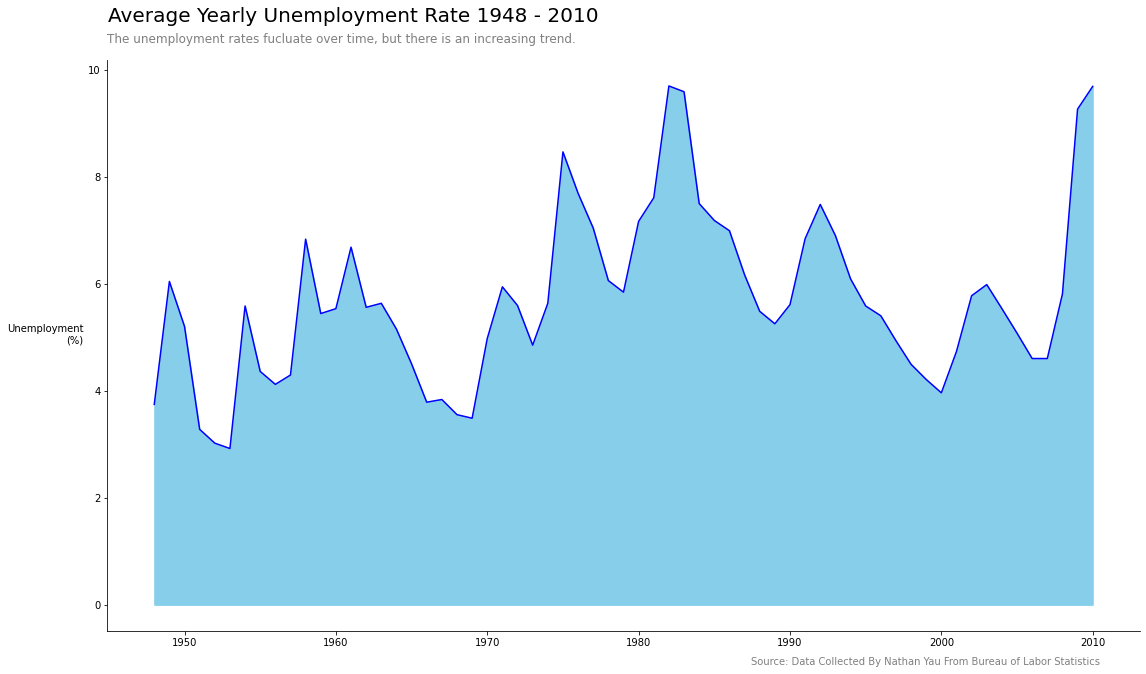

In [5]:
# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(18.5, 10.5)

# Add plot to figure
ax1.fill_between(data_grp['Year'], data_grp['Value'], color = 'skyblue')
ax1.plot(data_grp['Year'], data_grp['Value'], color = 'blue')

# Set titles, caption and axis labels
fig.suptitle("Average Yearly Unemployment Rate 1948 - 2010", x = 0.31, y = 0.95, fontsize=20)
fig.text(.87, .08, 'Source: Data Collected By Nathan Yau From Bureau of Labor Statistics', ha = 'right', color = 'gray')
ax1.set_title("The unemployment rates fucluate over time, but there is an increasing trend.", y = 1.02, loc='left', color = 'gray')
ax1.set_ylabel("Unemployment\n(%)", rotation = 0, ha = 'right')

# Remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Show plot
plt.show

# save file
fig.savefig("python_area.png")

In [6]:
# group data by month
data_grp_mon = data.groupby('Period', as_index = False)['Value'].mean()

# change period to month abbreviations
data_grp_mon['Period'] = data_grp_mon['Period'].replace({"M01": "Jan", "M02": "Feb", "M03": "Mar", "M04": "Apr", "M05": "May", "M06": "Jun", "M07": "Jul", "M08": "Aug", "M09": "Sep", "M10": "Oct", "M11": "Nov", "M12": "Dec"})

# sort data
data_grp_mon = data_grp_mon.sort_values(by = ['Value'], ascending = False)

print(data_grp_mon)

   Period     Value
11    Dec  5.706452
9     Oct  5.690323
10    Nov  5.685484
1     Feb  5.677778
0     Jan  5.671429
5     Jun  5.666129
6     Jul  5.664516
7     Aug  5.662903
8     Sep  5.661290
4     May  5.643548
3     Apr  5.637097
2     Mar  5.630645


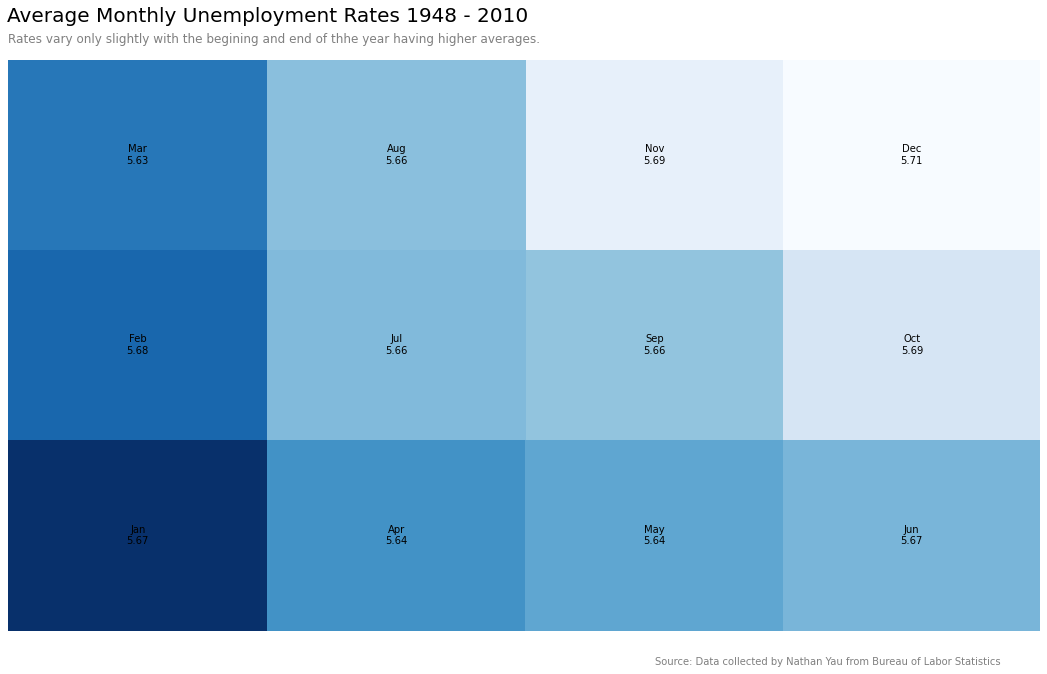

In [14]:
# create labels
lbl = []
for i in range(0, len(data_grp_mon)):
    lbl.append('{}\n{:.2f}'.format(data_grp_mon['Period'][i], data_grp_mon['Value'][i]))
    
# set colors
import matplotlib

cmap = matplotlib.cm.Blues
mini=min(data_grp_mon['Value'])
maxi=max(data_grp_mon['Value'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data_grp_mon['Value']]

    
# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(18.5, 10.5)

# Add plot to figure
squarify.plot(sizes = data_grp_mon['Value'], label = lbl, color = colors)


# Set titles, caption and axis labels
fig.suptitle("Average Monthly Unemployment Rates 1948 - 2010", x = 0.32, y = 0.95, fontsize=20)
fig.text(.87, .08, 'Source: Data collected by Nathan Yau from Bureau of Labor Statistics', ha = 'right', color = 'gray')
ax1.set_title("Rates vary only slightly with the begining and end of thhe year having higher averages.", y = 1.02, loc='left', color = 'gray')

# Remove axis
plt.axis('off')

# Show plot
plt.show

# save file
fig.savefig("python_treemap.png")

In [8]:
# Load dataset
url_2 = '~/Desktop/DSC 640/ex3-3/expenditures.txt'
data_2 = pd.read_csv(url_2, sep = '\t')

In [9]:
# group data
data_2_grp = data_2.groupby(['year', 'category']).agg({'expenditure': 'sum'})

data_2_grp['percent'] = data_2_grp.groupby(level = 0).apply(lambda x: 100 * x / x.sum())

data_2_grp = data_2_grp.reset_index()

In [10]:
data_2_grp.head()

,year,category,expenditure,percent
0,1984,Alcoholic Beverages,275,1.251593
1,1984,Apparel,1319,6.003095
2,1984,Cash Contributions,706,3.213180
3,1984,Education,303,1.379028
4,1984,Entertainment,1055,4.801566


In [11]:
print(data_2_grp[:15])

    year             category  expenditure    percent
0   1984  Alcoholic Beverages          275   1.251593
1   1984              Apparel         1319   6.003095
2   1984   Cash Contributions          706   3.213180
3   1984            Education          303   1.379028
4   1984        Entertainment         1055   4.801566
5   1984                 Food         3290  14.973603
6   1984           Healthcare         1049   4.774258
7   1984              Housing         6674  30.375023
8   1984        Miscellaneous          451   2.052612
9   1984        Personal Care          289   1.315310
10  1984   Personal Insurance         1897   8.633716
11  1984              Reading          132   0.600765
12  1984     Tobacco Products          228   1.037684
13  1984       Transportation         4304  19.588567
14  1985  Alcoholic Beverages          306   1.302737


In [12]:
x = list(pd.unique(data_2_grp['year']))

y0 = data_2_grp[data_2_grp['category'] == 'Alcoholic Beverages']
y0 = list(y0['percent'])

y1 = data_2_grp[data_2_grp['category'] == 'Apparel']
y1 = list(y1['percent'])

y2 = data_2_grp[data_2_grp['category'] == 'Cash Contributions']
y2 = list(y2['percent'])

y3 = data_2_grp[data_2_grp['category'] == 'Education']
y3 = list(y3['percent'])

y4 = data_2_grp[data_2_grp['category'] == 'Entertainment']
y4 = list(y4['percent'])

y5 = data_2_grp[data_2_grp['category'] == 'Food']
y5 = list(y5['percent'])

y6 = data_2_grp[data_2_grp['category'] == 'Healthcare']
y6 = list(y6['percent'])

y7 = data_2_grp[data_2_grp['category'] == 'Housing']
y7 = list(y7['percent'])

y8 = data_2_grp[data_2_grp['category'] == 'Miscellaneous']
y8 = list(y8['percent'])

y9 = data_2_grp[data_2_grp['category'] == 'Personal Care']
y9 = list(y9['percent'])

y10 = data_2_grp[data_2_grp['category'] == 'Personal Insurance']
y10 = list(y10['percent'])

y11 = data_2_grp[data_2_grp['category'] == 'Reading']
y11 = list(y11['percent'])

y12 = data_2_grp[data_2_grp['category'] == 'Tobacco Products']
y12 = list(y12['percent'])

y13 = data_2_grp[data_2_grp['category'] == 'Transportation']
y13 = list(y13['percent'])

y = {'y0': y0, 'y1': y1, 'y2': y2, 'y3': y3, 'y4': y4, 'y5': y5, 'y6': y6, 'y7': y7, 'y8': y8, 'y9': y9, 'y10': y10, 'y11': y11, 'y12': y12, 'y13': y13}

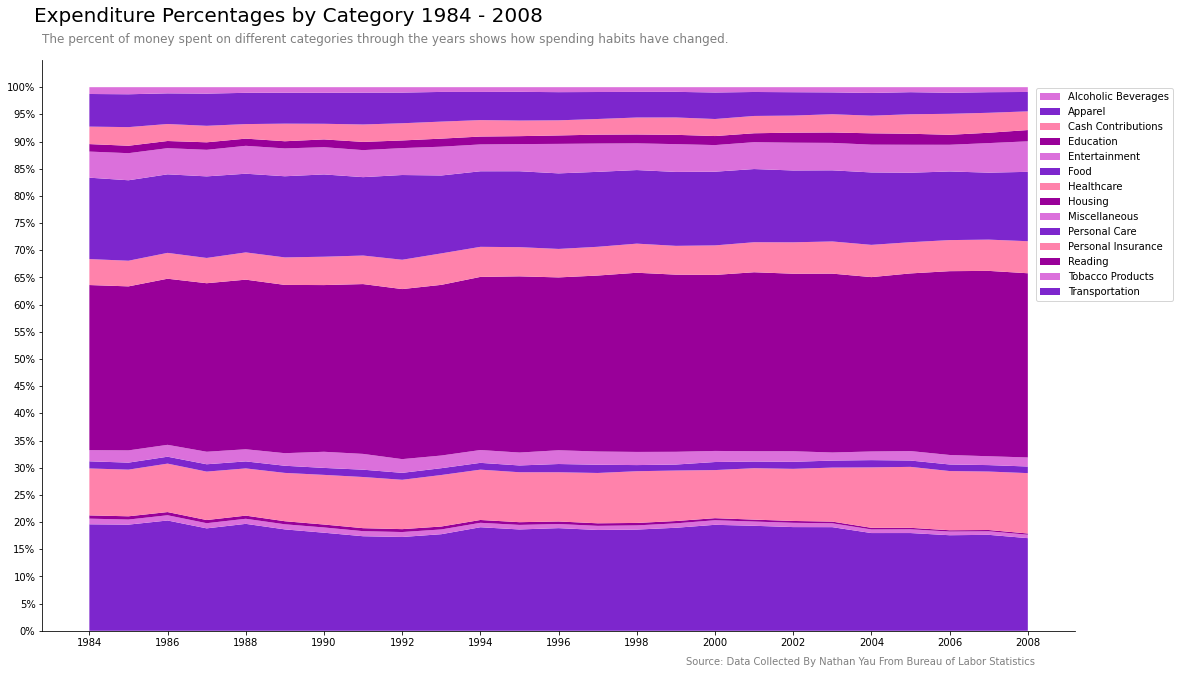

In [13]:
# set colors
colors_2 = ["#7D26CD", "#DB70DB", "#990099", "#FF82AB", "#7D26CD", "#DB70DB", "#990099", "#FF82AB", "#7D26CD", "#DB70DB", "#990099", "#FF82AB", "#7D26CD", "#DB70DB"]

# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(18.5, 10.5)

# Add plot to figure
ax1.stackplot(x, y['y13'], y['y12'], y['y11'], y['y10'], y['y9'], y['y8'], y['y7'], y['y6'], y['y5'], y['y4'], y['y3'], y['y2'], y['y1'], y['y0'],
              colors = colors_2,
             labels = np.sort(pd.unique(data_2_grp['category']))[::-1])

# Set titles, caption and axis labels
fig.suptitle("Expenditure Percentages by Category 1984 - 2008", x = 0.31, y = 0.95, fontsize=20)
fig.text(.87, .08, 'Source: Data Collected By Nathan Yau From Bureau of Labor Statistics', ha = 'right', color = 'gray')
ax1.set_title("The percent of money spent on different categories through the years shows how spending habits have changed.", y = 1.02, loc='left', color = 'gray')
ax1.set_ylabel("")

# set x axis labels
plt.xticks(np.arange(1984, 2009, step = 2))


# set y axis labels
plt.yticks(np.arange(0, 101, step = 5))
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

#show legend reverse order of plot
handles, labels = ax1.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.1, .96))

# Remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Show plot
plt.show

# save file
fig.savefig("python_stackedarea.png")